In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import r2_score
from keras import callbacks
import pickle

In [2]:
data = pd.read_csv("cac40.csv", parse_dates = True)

In [3]:
data.head(5)

,Date,Open,High,Low,Close,Turnover
0,03/01/2000,6024.38,6102.12,5901.77,5917.37,-
1,04/01/2000,5922.23,5925.07,5657.20,5672.02,-
2,05/01/2000,5521.83,5589.50,5461.59,5479.70,-
3,06/01/2000,5485.93,5530.26,5388.85,5450.11,-
4,07/01/2000,5423.88,5561.69,5423.88,5539.61,-


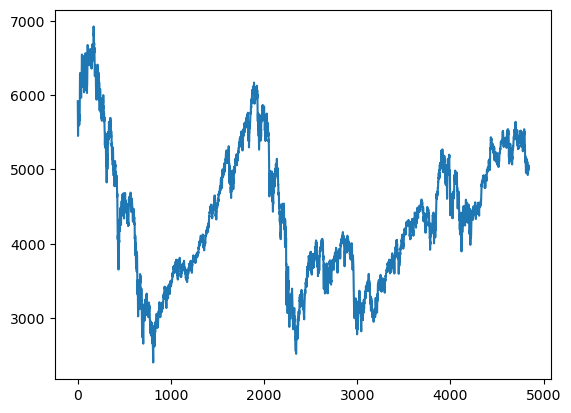

In [4]:
plt.plot(data.Close)

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

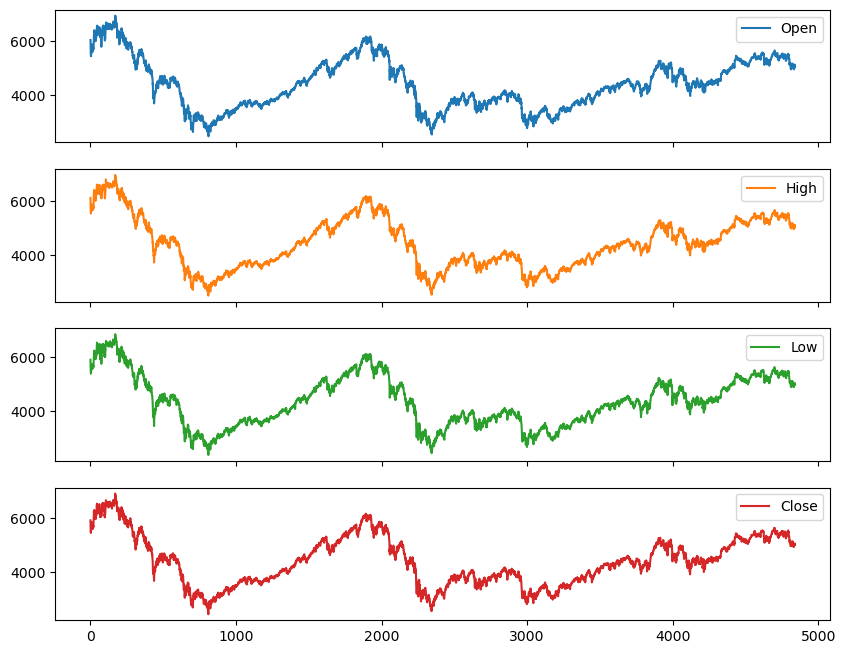

In [5]:
data.plot(subplots = True, layout = (5,1), figsize = (10, 10))

In [6]:
len = data.shape[0]
end = int(0.8 * len)
len

4841

In [7]:
newdata = data.iloc[:, 1]

In [8]:
X_train, y_train, X_test, y_test = [], [], [] , []

In [9]:
T = 10

In [10]:
for i in range(end):
  X_train.append(newdata[i:i+T])
  y_train.append(newdata[i+T])
X_train, y_train = np.array(X_train).reshape(end, T, 1), np.array(y_train).reshape(-1, 1)

In [11]:
for i in range(end - T, len - T):
  X_test.append(newdata[i:i+T])
  y_test.append(newdata[i+T])
X_test, y_test = np.array(X_test).reshape(len-end, T, 1), np.array(y_test).reshape(-1, 1)

In [12]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3872, 10, 1) (3872, 1) (969, 10, 1) (969, 1)


In [13]:
N = X_train.shape[2]
print(N)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation = 'relu', input_shape = (T,N)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(64, activation = 'linear'))
model.add(Dense(32, activation = 'linear'))
model.add(Dense(1, activation = 'relu'))

1


In [14]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [15]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights = True)

In [16]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32, callbacks = [callback])

Epoch 1/50
121/121 [==============================] - 7s 15ms/step - loss: 3177494.0000 - accuracy: 0.0000e+00
Epoch 2/50
121/121 [==============================] - 2s 16ms/step - loss: 355390.2500 - accuracy: 0.0000e+00
Epoch 3/50
121/121 [==============================] - 2s 15ms/step - loss: 12508.1016 - accuracy: 0.0000e+00
Epoch 4/50
121/121 [==============================] - 2s 15ms/step - loss: 11605.3936 - accuracy: 0.0000e+00
Epoch 5/50
121/121 [==============================] - 2s 15ms/step - loss: 11717.8799 - accuracy: 0.0000e+00
Epoch 6/50
121/121 [==============================] - 2s 14ms/step - loss: 12178.4990 - accuracy: 0.0000e+00
Epoch 7/50
121/121 [==============================] - 2s 14ms/step - loss: 11378.0742 - accuracy: 0.0000e+00
Epoch 8/50
121/121 [==============================] - 2s 16ms/step - loss: 11622.5547 - accuracy: 0.0000e+00
Epoch 9/50
121/121 [==============================] - 2s 15ms/step - loss: 11133.7383 - accuracy: 0.0000e+00
Epoch 10/50
121/

In [17]:
predict_x=model.predict(X_test) 
for i in range(predict_x.shape[0]):
    print(predict_x[i], y_test[i])

31/31 [==============================] - 1s 10ms/step
[4730.2397] [4865.68]
[4752.3003] [4885.]
[4772.0234] [4884.89]
[4793.087] [4905.77]
[4809.2686] [4937.43]
[4826.2334] [4922.43]
[4846.874] [4882.94]
[4857.2827] [4929.04]
[4869.669] [4953.68]
[4882.839] [4940.64]
[4890.625] [4930.06]
[4895.989] [4900.37]
[4898.3696] [4990.96]
[4907.6035] [4997.94]
[4916.8667] [5019.02]
[4925.8994] [5065.62]
[4938.5923] [5032.18]
[4956.407] [5029.97]
[4966.512] [5044.42]
[4974.2373] [5078.25]
[4988.231] [5040.86]
[4999.5522] [5073.28]
[5015.5234] [4992.55]
[5016.802] [5020.09]
[5018.9136] [5052.25]
[5019.6387] [5073.99]
[5022.1445] [5009.63]
[5019.998] [5068.06]
[5022.738] [5106.36]
[5028.786] [5146.78]
[5037.2656] [5156.16]
[5047.597] [5224.22]
[5063.085] [5236.11]
[5088.4673] [5252.48]
[5112.585] [5230.98]
[5130.001] [5246.75]
[5147.61] [5214.33]
[5167.749] [5154.91]
[5176.865] [5205.1]
[5183.674] [5210.7]
[5190.1094] [5217.08]
[5196.6226] [5202.63]
[5193.415] [5198.79]
[5190.8955] [5256.79]
[5190

[5365.8223] [5309.91]
[5365.7764] [5299.4]
[5360.5576] [5335.12]
[5348.412] [5317.12]
[5340.4795] [5336.98]
[5333.325] [5360.97]
[5328.1094] [5328.86]
[5324.7607] [5327.73]
[5316.172] [5291.08]
[5305.7305] [5306.21]
[5298.9165] [5290.84]
[5296.215] [5347.86]
[5300.252] [5337.11]
[5300.5293] [5280.2]
[5299.007] [5261.42]
[5290.3296] [5264.69]
[5280.9155] [5275.99]
[5275.4375] [5282.58]
[5269.9854] [5254.14]
[5266.7] [5283.6]
[5264.2285] [5235.36]
[5259.7236] [5243.53]
[5249.49] [5305.22]
[5244.0938] [5330.58]
[5250.6016] [5273.]
[5252.9907] [5259.55]
[5251.9717] [5273.24]
[5251.5586] [5295.04]
[5253.312] [5282.87]
[5255.328] [5235.83]
[5251.0615] [5268.23]
[5253.421] [5157.59]
[5246.847] [5151.19]
[5230.747] [5170.54]
[5211.7646] [5174.79]
[5203.8545] [5177.21]
[5194.2305] [5149.79]
[5182.543] [5160.7]
[5169.834] [5172.03]
[5158.929] [5158.23]
[5151.8936] [5228.93]
[5146.5195] [5246.2]
[5155.915] [5238.41]
[5166.3335] [5219.67]
[5170.773] [5196.13]
[5173.9214] [5239.46]
[5179.107] [5188

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(predict_x, y_test)

0.9369884135914539

In [20]:
test = pd.DataFrame(y_test)
test['pred'] = predict_x

In [21]:
test.rename(columns = {0 : 'actual', 'pred' : 'predicted'}, inplace = True)
test

,actual,predicted
0,4865.68,4730.239746
1,4885.00,4752.300293
2,4884.89,4772.023438
3,4905.77,4793.086914
4,4937.43,4809.268555
...,...,...
964,4998.14,4981.748047
965,5026.66,4977.039062
966,5016.45,4969.571289
967,5112.58,4965.869141


<AxesSubplot:>

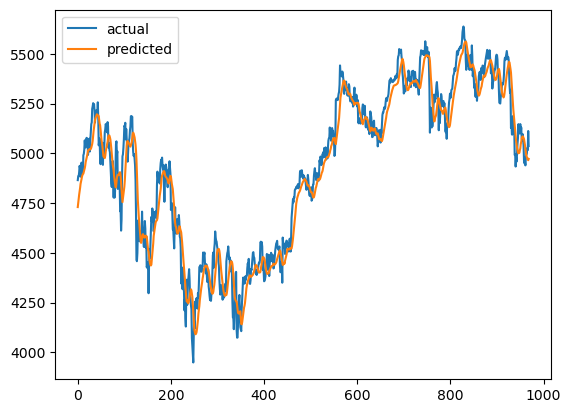

In [22]:
test.plot()


In [23]:
filename = 'model_pickle_cac40_lstm.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-2

In [24]:
new = X_test[-1]
final = y_test[-1]
np.append(new, final)
new

array([[4962.85],
       [4949.72],
       [4958.89],
       [4939.79],
       [4982.54],
       [4992.53],
       [4998.14],
       [5026.66],
       [5016.45],
       [5112.58]])

In [25]:
predictions = []
for i in range(10):
    fin = new.reshape(1, 10, 1)
    final = model.predict(fin)
    for j in final:
        new = np.append(new, j)
        predictions.append(j)
    new = new[1:]

1/1 [==============================] - 0s 51ms/step


In [26]:
predictions

[array([4972.1025], dtype=float32),
 array([4975.8516], dtype=float32),
 array([4978.316], dtype=float32),
 array([4977.08], dtype=float32),
 array([4983.4307], dtype=float32),
 array([4980.515], dtype=float32),
 array([4979.326], dtype=float32),
 array([4978.1753], dtype=float32),
 array([4973.668], dtype=float32),
 array([4969.4556], dtype=float32)]

In [29]:
x = [i+data['Close'].shape[0] for i in range(10)]

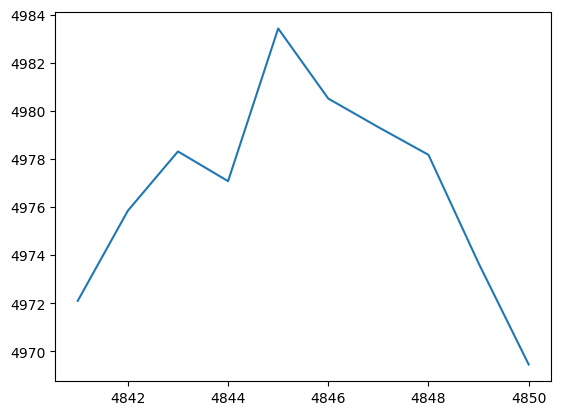

In [30]:
plt.plot(x,predictions)